In [1]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

# for least square solution to line
from numpy.linalg import lstsq

plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

import sys
sys.path.append('../..')
import gempy as gp

In [2]:
n_pts = 10 # Points per layer

# Linear functions for line data
l1 = lambda x : 0.25*x + 30
l2 = lambda x : 0.25*x + 40
l3 = lambda x : 0.25*x + 50

# set seed for reproducibility
np.random.seed(123)
# sampling points
l1_pts_x = np.random.uniform(0,90,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,90,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,90,n_pts)
l3_pts_y = l3(l3_pts_x)

(0, 100)

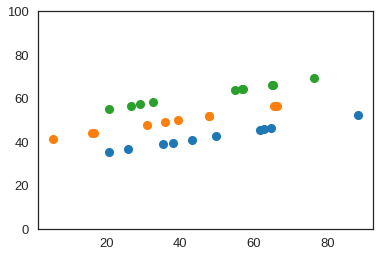

In [3]:
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.ylim([0,100])

## Disrupting series

In [4]:
d_point_1 = (40, 60)
d_point_2 = (60, 20)

In [5]:
x_coords, y_coords = [40,60], [60,20]
A = np.vstack([x_coords, np.ones(len(x_coords))]).T
m, c = lstsq(A, y_coords, rcond=None)[0]
print("Line Solution for Disrupting Series is y = {:.1f}x + {:.1f}".format(*[m,c]))

Line Solution for Disrupting Series is y = -2.0x + 140.0


In [6]:
offset = 10 # offset of block on right side of fault
f = lambda x : m*x + c

# Create filters to determine points on each side of fault
filter_l1 = f(l1_pts_x) < l1_pts_y
filter_l2 = f(l2_pts_x) < l2_pts_y
filter_l3 = f(l3_pts_x) < l3_pts_y

# create copies of arrays to avoid confusion...
l1_pts_x_fault = l1_pts_x.copy()
l1_pts_y_fault = l1_pts_y.copy()
l2_pts_x_fault = l2_pts_x.copy()
l2_pts_y_fault = l2_pts_y.copy()
l3_pts_x_fault = l3_pts_x.copy()
l3_pts_y_fault = l3_pts_y.copy()

# Adjust y-values
l1_pts_y_fault[filter_l1] -= offset
l2_pts_y_fault[filter_l2] -= offset
l3_pts_y_fault[filter_l3] -= offset
# Adjust x-values
l1_pts_x_fault[filter_l1] -= 1/m*offset
l2_pts_x_fault[filter_l2] -= 1/m*offset
l3_pts_x_fault[filter_l3] -= 1/m*offset

(0, 100)

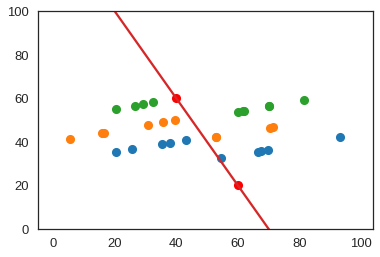

In [7]:
f = lambda x : m*x + c

plt.plot(l1_pts_x_fault, l1_pts_y_fault, 'o')
plt.plot(l2_pts_x_fault, l2_pts_y_fault, 'o')
plt.plot(l3_pts_x_fault, l3_pts_y_fault, 'o')

plt.plot(x_coords, y_coords, 'ro')
xrange = np.arange(100)
plt.plot(xrange, f(xrange))

plt.ylim([0,100])

# plt.axis('equal')

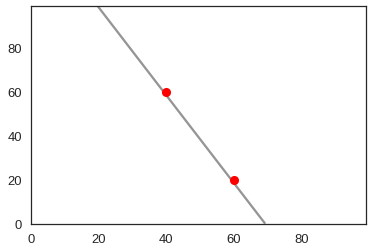

In [8]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)
# trick: add points at lower left and upper right to obtain gradients in field
# (otherwise, we would simply interpolate zeros...)
x_coords_ext = np.hstack([x_coords, 0, 100])
y_coords_ext = np.hstack([y_coords, 0, 100])
rbf = Rbf(x_coords_ext, y_coords_ext, [0,0,-1,1], function="gaussian", epsilon=1000)
ZI = rbf(XI, YI)
plt.contour(ZI, 0)
plt.plot(x_coords, y_coords, 'ro')

In [9]:
# left domain
l1_pts_x_left = l1_pts_x_fault[np.where(rbf(l1_pts_x_fault, l1_pts_y_fault) < 0)]
l1_pts_y_left = l1_pts_y_fault[np.where(rbf(l1_pts_x_fault, l1_pts_y_fault) < 0)]
l2_pts_x_left = l2_pts_x_fault[np.where(rbf(l2_pts_x_fault, l2_pts_y_fault) < 0)]
l2_pts_y_left = l2_pts_y_fault[np.where(rbf(l2_pts_x_fault, l2_pts_y_fault) < 0)]
l3_pts_x_left = l3_pts_x_fault[np.where(rbf(l3_pts_x_fault, l3_pts_y_fault) < 0)]
l3_pts_y_left = l3_pts_y_fault[np.where(rbf(l3_pts_x_fault, l3_pts_y_fault) < 0)]
# right domain
l1_pts_x_right = l1_pts_x_fault[np.where(rbf(l1_pts_x_fault, l1_pts_y_fault) > 0)]
l1_pts_y_right = l1_pts_y_fault[np.where(rbf(l1_pts_x_fault, l1_pts_y_fault) > 0)]
l2_pts_x_right = l2_pts_x_fault[np.where(rbf(l2_pts_x_fault, l2_pts_y_fault) > 0)]
l2_pts_y_right = l2_pts_y_fault[np.where(rbf(l2_pts_x_fault, l2_pts_y_fault) > 0)]
l3_pts_x_right = l3_pts_x_fault[np.where(rbf(l3_pts_x_fault, l3_pts_y_fault) > 0)]
l3_pts_y_right = l3_pts_y_fault[np.where(rbf(l3_pts_x_fault, l3_pts_y_fault) > 0)]

In [32]:
l3_pts_x_left

array([29.06630225, 32.56097901, 20.54369078, 26.43426417])

In [10]:
import pandas as pd

In [15]:
xses = np.concatenate([l1_pts_x_right, l2_pts_x_right, l3_pts_x_right])
yses = np.ones_like(xses)
zses = np.concatenate([l1_pts_y_right, l2_pts_y_right, l3_pts_y_right])


In [19]:
xses = x_coords
yses = np.ones_like(x_coords)
zses = y_coords

In [20]:
interfaces ={'x':xses, 'y':yses, 'z':zses}

In [21]:
df = pd.DataFrame.from_dict(interfaces)

In [22]:
df.to_csv('hierarchy_interfaces_fault.csv')

(0, 100)

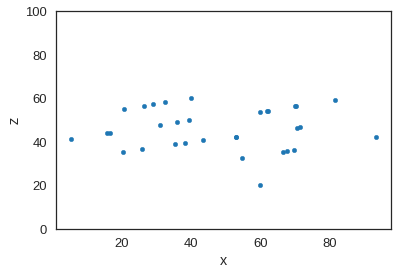

In [14]:
df.plot.scatter('x', 'z')
plt.ylim([0, 100])

In [15]:
import math as m

In [33]:
def get_deg(x, y):
    dx = max(x) - min(x)
    dy = max(y) - min(y)
    
    degs = m.atan(dy/dx) * (180/m.pi)
    return degs

In [34]:
m.atan(40/20)*(180/np.pi)

63.43494882292201

In [35]:
get_deg(x_coords,y_coords)

63.43494882292201

In [38]:
get_deg(l2_pts_x, l2_pts_y)

14.036243467926482

In [39]:
l1_pts_x_fault

array([67.6822267 , 25.75254015, 20.41663082, 54.61832922, 69.75220728,
       38.07958141, 93.26877785, 66.63467647, 43.28387113, 35.29057664])

In [40]:
l1_pts_y_fault

array([35.67055668, 36.43813504, 35.10415771, 32.4045823 , 36.18805182,
       39.51989535, 42.06719446, 35.40866912, 40.82096778, 38.82264416])

In [43]:
len(l3_pts_x_fault)

10

In [33]:
left_f = pd.read_csv('hierarchy_interfaces_fault_left.csv')
right_f = pd.read_csv('hierarchy_interfaces_fault_right.csv')
f = pd.read_csv('hierarchy_interfaces_fault.csv')